The CSV file for Microsoft's stock contains the OHLCVA data where, 



* O: Open
* H: High
* L: Low
* C: Close
* V: Volume
* A: Adjusted









In [0]:
from google.colab import files
#files.upload()

In [0]:
import matplotlib.pyplot as plt

In [27]:
import pandas as pd
df_stock=pd.read_csv('MSFTPrices.csv.txt', parse_dates=['Date'])
df_stock.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [28]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Data columns (total 7 columns):
Date        4561 non-null datetime64[ns]
Open        4561 non-null float64
High        4561 non-null float64
Low         4561 non-null float64
Close       4561 non-null float64
Volume      4561 non-null int64
Adjusted    4561 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 249.5 KB


In [0]:
df_stock = df_stock.sort_values(by='Date')

In [30]:
df_stock.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In this dataframe, the adjusted price is the most important value of the stock. Because the adjusted value is normalized for stock spits, Dividends, etc. We will be using the adjusted close price of the stock to calculate the returns of the stock.

Let's calculate the daily change in the stock prices first.

In [0]:
df_stock['Returns'] = df_stock['Adjusted'].pct_change()
# convert decimal returns to percent returns
percent_returns = df_stock['Returns']*100

In [32]:
df_stock.head()

,Date,Open,High,Low,Close,Volume,Adjusted,Returns
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688,-0.033498
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828,0.013068


Text(0,0.5,'Percent change over yesterday')

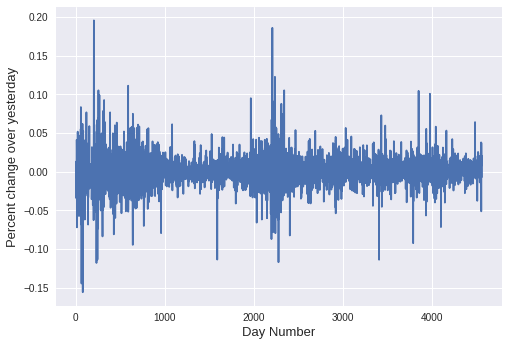

In [33]:
df_stock['Returns'].plot()
plt.xlabel('Day Number', fontsize=13)
plt.ylabel('Change over yesterday',fontsize=13)

Dropping Null values from percent returns.

In [0]:
percent_returns.dropna(inplace=True)

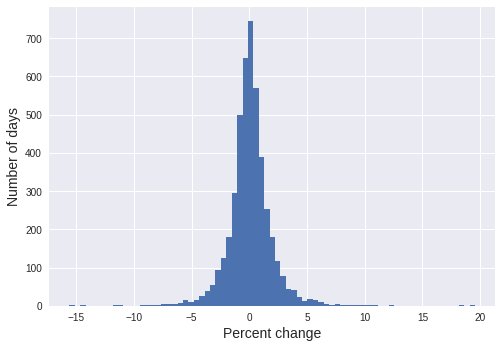

In [41]:
plt.hist(percent_returns, bins=75)
plt.xlabel('Percent change', fontsize=14)
plt.ylabel('Number of days', fontsize=14)
plt.show()


Moments of a distribution:



1.   Mean
2.   Variance
3. Kurtosis
4. Skewness




Normal distributions tend to have a skewness of 0 and kurtosis of 3.

Financial returns however, tend to have positive skewness and kurtosis > 3

This means financial returns have a higher probability of outliers and better or worse returns than a normal distribution.

A long term investor is not very interested in the daily fluctuations of the stocks. They're more interested in the annualized return. Let's calculate that using the following formula:



```
Average annualized return = ((1+mu)^252) - 1
```



In [48]:
import numpy as np

mean_return_daily = np.mean(df_stock['Returns'])

print('Mean daily return is {}'.format(mean_return_daily * 100))

mean_annualized_return = ((1+mean_return_daily)**252) - 1

print('Mean annualized return is {}'.format(mean_annualized_return * 100))

Mean daily return is 0.03777754643575774
Mean annualized return is 9.985839482858783


Thus, mean daily return of 0.03% becomes an annualized return of 9.98%. Now let's calculate the second moment - Variance.

In [51]:
std_daily = np.std(df_stock['Returns'])
print('The daily standard deviation is {}'.format(std_daily))
var_daily = std_daily ** 2
print('The daily variance is {}'.format(var_daily))

The daily standard deviation is 0.019341100408708317
The daily variance is 0.00037407816501973704
